In [147]:
import pandas as pd 
import numpy as np

In [142]:
data = pd.read_csv('results.csv')
data.dropna(how='all',axis=0)
data.drop(data[data['Speed'] > 70].index, inplace = True) 
data.tail ()
#data.stack().reset_index()

,Speed,TAC,dTAC,Sliding,Kinesin,Kinesin_con,SxIP_con,movie_number
184,35.795,0.0,0.0,0.0,1.0,6.0,15.0,NaN
185,44.062,0.0,0.0,0.0,1.0,6.0,15.0,NaN
186,25.368,0.0,0.0,0.0,1.0,6.0,15.0,NaN
187,61.071,0.0,0.0,0.0,1.0,6.0,15.0,NaN
188,60.000,0.0,0.0,0.0,1.0,6.0,15.0,NaN


In [143]:
data_gro=data[['Kinesin','Kinesin_con','Speed']].groupby(["Kinesin_con"])


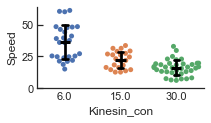

In [164]:
data_kinesin = data[data['Kinesin']==1]
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig = plt.figure(figsize=(3, 1.5))
#sns.set(style="darkgrid")
sns.set_style("white")
sns.despine()


ax= sns.swarmplot(x="Kinesin_con",y="Speed",data=data_kinesin,zorder=1)
ax = sns.pointplot(x="Kinesin_con",y="Speed",data=data_kinesin,estimator= np.mean,
                  capsize=.1,
                  join=False,
                  color='black',
                  size=4,zorder=2,ci='sd',markers='_',scale = 1.5)
ax.tick_params(left=True,direction='in')
sns.despine()
ax.set(ylim=(0, None))

plt.savefig('speed.svg', dpi=300)

In [88]:
data_gro=data_kinesin[['Kinesin_con','Speed']].groupby(["Kinesin_con"])
test=(data_gro.get_group(15.0))
datatt = [['6', data_gro.get_group(6.0)], ['15', data_gro.get_group(15.0)], ['30', data_gro.get_group(30.0)]] 
#datt=data_gro.get_group(15.0)
datt=pd.DataFrame(datatt)
datt
test.to_clipboard()

In [5]:

#data_gro['Fraction_tubes'] = data_gro.apply(lambda row: row.TAC / 
                                  #(row.Kinesin ), axis = 1) 
data_gro.sum(axis=1)

Speed
0.841     31.0
1.265     31.0
1.272     16.0
1.291      7.0
1.331     31.0
1.412     31.0
1.461     16.0
1.473      7.0
1.489      7.0
1.574     16.0
1.611     16.0
1.680      7.0
1.705     16.0
1.710      7.0
1.713     16.0
1.723      7.0
1.740     31.0
1.746      7.0
1.766     16.0
1.836     16.0
1.837     31.0
1.865     16.0
1.875      7.0
1.918     31.0
1.934     16.0
1.963      7.0
2.042     16.0
2.054     16.0
2.074     16.0
2.094     16.0
          ... 
18.375    31.0
18.525    31.0
18.646    31.0
18.750     7.0
19.125    31.0
19.250    31.0
19.514    31.0
19.688    31.0
19.737    31.0
21.500    16.0
21.875    16.0
22.383    31.0
22.941    31.0
23.000    31.0
23.182    16.0
23.906     7.0
24.609    16.0
25.000    31.5
25.313     7.0
26.116    16.0
26.250    16.0
26.875    16.0
27.404    16.0
28.977    16.0
29.250    16.0
29.669    31.0
31.364    16.0
32.875    31.0
33.542    16.0
37.500     7.0
Length: 118, dtype: float64

In [25]:
def fraction_tubes(data,column_name):
    for items in column_name:
        data_gro['FT_'+items] = data [items]/data.sum(axis=1)
        #print (items)
        
    
    
fraction_tubes(data_gro,['TAC', 'dTAC', 'Sliding', 'Kinesin'])
#data_gro['Fraction_tubes_TAC'] = data_gro ['TAC']/data_gro.sum(axis=1)
data_gro

,TAC,dTAC,Sliding,Kinesin,FT_TAC,FT_dTAC,FT_Sliding,FT_Kinesin
Kinesin_con,,,,,,,,
6.0,9.0,0.0,0.0,5.0,0.642857,0.000000,0.000000,0.341463
15.0,33.0,0.0,5.0,26.0,0.515625,0.000000,0.077501,0.402520
30.0,17.0,2.0,8.0,42.0,0.246377,0.028882,0.115481,0.605268


<Figure size 648x648 with 0 Axes>

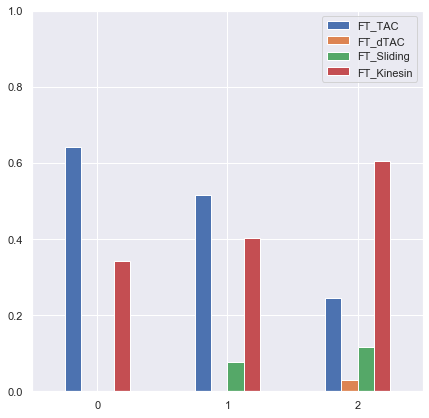

In [26]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(9, 9))
sns.set(style="darkgrid")
#sns.barplot(data_gro[['FT_TAC','FT_dTAC','FT_Sliding','FT_Kinesin']],alpha=0.9)
#plt.bar(data_gro[['FT_TAC','FT_dTAC','FT_Sliding','FT_Kinesin']])
data_gro[['FT_TAC','FT_dTAC','FT_Sliding','FT_Kinesin']].plot(kind='bar',figsize=(7,7),ylim=(0,1),rot=0,use_index=False,xticks=(0.5,1,2),stacked=False)
plt.savefig('Ratio.svg', dpi=300)


<Figure size 648x648 with 0 Axes>

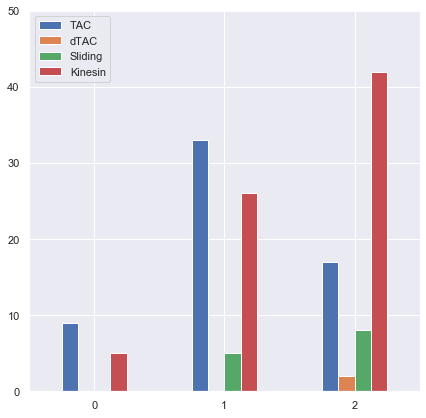

In [27]:
fig = plt.figure(figsize=(9, 9))
sns.set(style="darkgrid")
#sns.barplot(data_gro[['FT_TAC','FT_dTAC','FT_Sliding','FT_Kinesin']],alpha=0.9)
#plt.bar(data_gro[['FT_TAC','FT_dTAC','FT_Sliding','FT_Kinesin']])
data_gro[['TAC', 'dTAC', 'Sliding', 'Kinesin']].plot(kind='bar',figsize=(7,7),ylim=(0,50),rot=0,use_index=False,xticks=(0.5,1,2),stacked=False,table=False)
#plt.savefig('absolute.svg', dpi=300)